In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    result : str

In [9]:
def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""
    print(state)

    state["result"] = f"Hi there {state["name"]}! Your sum = {sum(state["values"])}"

    print(state)
    return state


In [10]:
graph = StateGraph(AgentState)

graph.add_node("processor", process_values)

graph.set_entry_point("processor")
graph.set_finish_point("processor")

app = graph.compile()

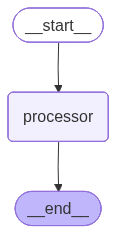

In [11]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
answers = app.invoke({
    "name":"Steve",
    "values":[1,2,3,4]
})

{'values': [1, 2, 3, 4], 'name': 'Steve'}
{'values': [1, 2, 3, 4], 'name': 'Steve', 'result': 'Hi there Steve! Your sum = 10'}


In [13]:
print(answers["result"])

Hi there Steve! Your sum = 10
